# Support Vector Machine (SVM) <a class="anchor" id="supportvectormachine"></a>
 - SVM is kind of Jack of All Trades for classifiers, because it is quite versatile and powerfull
 - It does not save all training samples like NearestNeigbour method, but only the samples near the border of class boundaries.
 - These boundary samples are called as support vectors.
 - SVM works for high dimensional data and large sample sizes
 - Can be used for both classification and regression
 - Can be extended to nonlinear decision boundaries using kernels

## Decision boundary
 - SVM uses samples near the different clusters to define a decision boundary
 - The boundary which maximises the marginal of the boundary will be selected
 - THe support vectors definind the boundary will be stored

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from snippets import plotDB, DisplaySupportVectors

from sklearn.model_selection import train_test_split

# Lets create a two-dimensional dataset containing two cluster centers
X,y=datasets.make_blobs(n_samples=200, centers=2, n_features=2, random_state=0, cluster_std=0.6)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

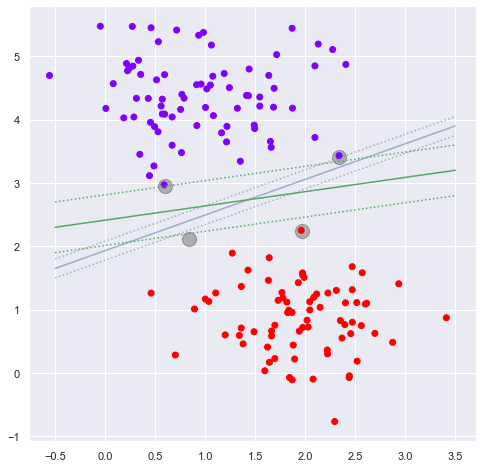

In [2]:
# Lets plot the data and optimal decision boundary with support vectors
a=plt.figure(figsize=(8,8))

plt.scatter([0.5965, 2.33479, 0.83645, 1.97], [2.9567, 3.4118, 2.11336, 2.23518],  s=200, c='k', alpha=0.3)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='rainbow')
ax=plt.gca()

# Plot decision boundaries
m=0.15; plt.plot([-0.5,3.5], [1.65,   3.9], 'b', alpha=0.5); plt.plot([-0.5,3.5], [1.65+m, 3.9+m], 'b:', alpha=0.5); plt.plot([-0.5,3.5], [1.65-m, 3.9-m], 'b:', alpha=0.5)
m=0.4; plt.plot([-0.5,3.5], [2.3, 3.2], 'g'); plt.plot([-0.5,3.5], [2.3+m, 3.2+m], 'g:'); plt.plot([-0.5,3.5], [2.3-m, 3.2-m], 'g:')

Accurary in the trainint set..1.000000
Accurary in the test set......1.000000
SVC(kernel='linear')


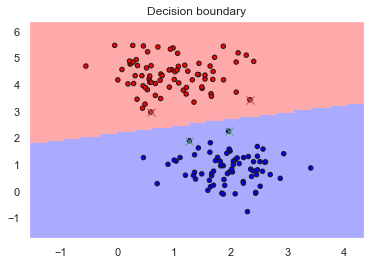

In [3]:
# Lets now try how actual linear SCV would work
from sklearn import svm, metrics
linsvc = svm.SVC(kernel='linear')
linsvc.fit(X_train, y_train)
plotDB(linsvc, X_train, y_train)
DisplaySupportVectors(X_train, y_train, linsvc)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=linsvc.predict(X_test)))
print(linsvc)

In [4]:
# Lets try slightly more complex case

# Lets create a two-dimensional dataset containing three cluster centers
X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

Accurary in the training set..0.940000
Accurary in the test set......0.920000
SVC(kernel='linear')


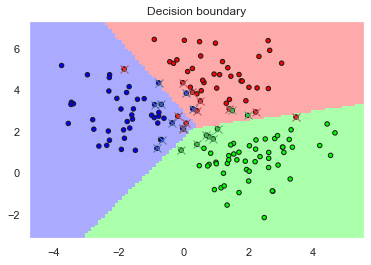

In [5]:
# Lets now try how actual linear SCV would work
from sklearn import svm
linsvc = svm.SVC(kernel='linear')
linsvc.fit(X_train, y_train)
plotDB(linsvc, X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=linsvc.predict(X_test)))
print(linsvc)

DisplaySupportVectors(X_train, y_train, linsvc)

Accurary in the trainint set..0.940000
Accurary in the test set......0.900000
LinearSVC()


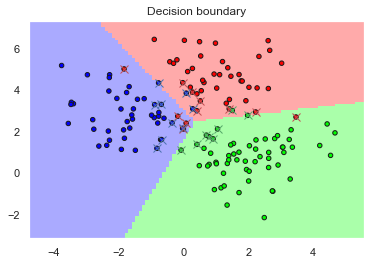

In [6]:
# Lets now try how actual linear SCV would work
Linsvc = svm.LinearSVC()
Linsvc.fit(X_train, y_train)
plotDB(Linsvc, X_train, y_train)

print("Accurary in the trainint set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=Linsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=Linsvc.predict(X_test)))
print(Linsvc)
DisplaySupportVectors(X_train, y_train, linsvc)

## Kernel SVM <a class="anchor" id="kernelsvm"></a>

Linear kernel 

Accurary in the training set..0.940000
Accurary in the test set......0.900000
SVC(C=0.5, gamma=0.1)


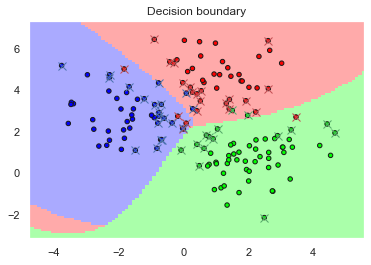

In [7]:
# Lets now try Kernel SVM
rbfsvc = svm.SVC(kernel='rbf', gamma=0.1, C=0.5)  # gamma > 2 means overfitting, try eg 25 and 0.05
rbfsvc.fit(X_train, y_train)
plotDB(rbfsvc, X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
DisplaySupportVectors(X_train, y_train, rbfsvc)

In [8]:
# Lets test the model with CV in higher nimensions

# Lets create a two-dimensional dataset containing three cluster centers
#X,y=datasets.make_blobs(n_samples=200, centers=5, n_features=3, random_state=0, cluster_std=2)
X,y=datasets.make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, cluster_std=1.1)

# Now the dataset will be splitted randomly to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

from sklearn.model_selection import cross_val_score
rbfsvc = svm.SVC(kernel='rbf', gamma=1, C=0.5)  # gamma > 2 means overfitting
scores = cross_val_score(rbfsvc, X_train, y_train, cv=5)
print("Mean CV score is %4.2f, all scores=" % (scores.mean()), scores)

# CV can be put into loop to find optimal gamma value
gamma=np.logspace(-2,1.2,40)
test_score=np.zeros(len(gamma))
train_score=np.zeros(len(gamma))
cv_score=np.zeros(len(gamma))
for i in range(len(gamma)):
    rbfsvc = svm.SVC(kernel='rbf', gamma=gamma[i], C=0.5)
    rbfsvc.fit(X_train, y_train)
    train_score[i]=metrics.accuracy_score(y_train, rbfsvc.predict(X_train))
    test_score[i]=metrics.accuracy_score(y_test, rbfsvc.predict(X_test))
    cv_score[i] = cross_val_score(rbfsvc, X_train, y_train, cv=5).mean()
    

Mean CV score is 0.91, all scores= [0.96666667 0.93333333 0.86666667 0.93333333 0.86666667]


Best gamma value is 0.066147
Accurary in the test set......0.980000


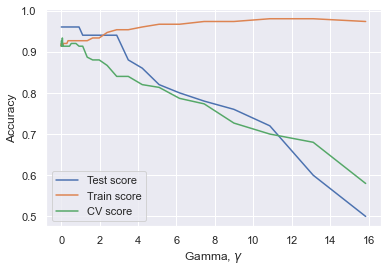

In [9]:
plt.plot(gamma, test_score, label="Test score")
plt.plot(gamma, train_score, label="Train score")
plt.plot(gamma, cv_score, label="CV score")
best_gamma=gamma[cv_score.argmax()]
print("Best gamma value is %f" % best_gamma)
rbfsvcbest = svm.SVC(kernel='rbf', gamma=best_gamma, C=0.5).fit(X_test, y_test)
plt.legend()
plt.xlabel('Gamma, $\gamma$')
plt.ylabel('Accuracy')
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvcbest.predict(X_test)))

## Non-linear SVM
 - If the data described by $p_i=[x_i, y_i]^T$ is not linearly separable, it can be made linearly separable by adding a new term, for example $z_i=x_i^2 + y_i^2$
 - In this case, third dimension is introduced, and the linear classifier can work in the new three dimensional space $ p_i'=[x_i, y_i, z_i]^T $ 
 - SVM uses this kernel trick to separate non-linear cases
 - The kernel functions include the dot product of two points in a suitable feature space. Thus defining a notion of similarity, with little computational cost even in very high-dimensional spaces.
 - There are many kernel options, most common being
   - Polynomial kernel $k(p_i, p_j) = (p_i \cdot p_j +1)^d$
   - Gaussian  kernel or Gaussian Radial Basis Function (RBF), shown below
   
   $$k(p_i, p_j) = \exp \left( - \frac{\Vert p_i-p_j \Vert^2}{2 \sigma^2} \right)
   \qquad 
   k(p_i, p_j) = \exp ( - \gamma \Vert p_i-p_j \Vert^2) $$
   
### Illustration of RBF
- The following code plots the RBF when $p_i$ is in origo and $p_j$ moves along x-axis. 
- In real case the RBF is N-dimensional, centered around a sample $p_i$

Text(0, 0.5, '$k([0,0,0]^T, [x,0,0]^T)$')

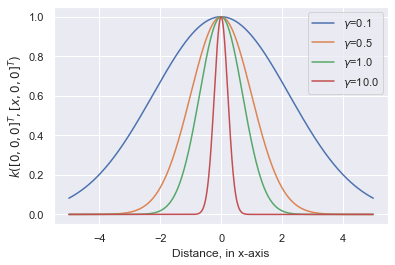

In [10]:
# Plot the radial basis functions (RBF) with different gamma values
xc=np.linspace(-5,5,1000)
for gamma in [0.1, 0.5, 1.0, 10.0, ]:
    r=np.exp(-gamma*xc**2)
    plt.plot(xc,r,label='$\gamma$=%3.1f' % (gamma))
plt.legend()
plt.xlabel('Distance, in x-axis')
plt.ylabel('$k([0,0,0]^T, [x,0,0]^T)$')


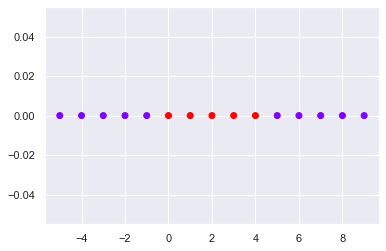

In [11]:
# Test with some example data.
# How to separate two classes with linear decision function
# This is one dimensional case, since the second dimension is dummy (only zeros)
x1=np.arange(-5,10)
x2=np.zeros(len(x1))
ytest=np.zeros(len(x1))
ytest[5:10]=1
plt.scatter(x1,x2,c=ytest, cmap='rainbow')


**Solution:** Use the 8th value as a support vector, and use RBF kernel to increase one more dimesion

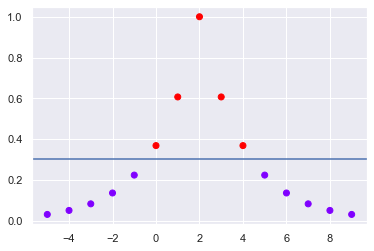

In [12]:
# Import norm, which calculates || p1- p2 ||^2
from scipy.linalg import norm

# Define the RBF function
def rbf(p1, p2, gamma):
    return np.exp(-gamma*norm(p1-p2))

# Calculate the kernel value for all data points
for i in range(len(x1)):
    x2[i]=rbf(x1[7], x1[i], 0.5)
    
plt.scatter(x1,x2,c=ytest, cmap='rainbow')

# Mark almost optimal decision boundary as horizontal line
plt.axhline(0.3) 

Now the classes are separable, but what is the optimal Gamma value?

### Testing RBF in circular data 

Accurary in the training set..1.000000
Accurary in the test set......1.000000
SVC()


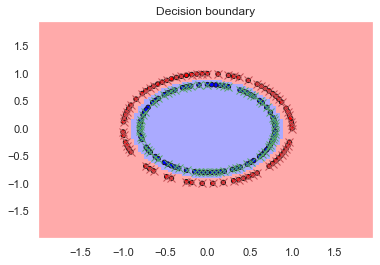

In [13]:
Xc,yc=datasets.make_circles(n_samples=200)
X_train, X_test, y_train, y_test = train_test_split(Xc,yc, test_size=0.25)

rbfsvc = svm.SVC(kernel='rbf', gamma='scale')
rbfsvc.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
plotDB(rbfsvc, X_train, y_train)
DisplaySupportVectors(X_train, y_train, rbfsvc)

Accurary in the training set..1.000000
Accurary in the test set......1.000000
SVC(gamma=0.5)


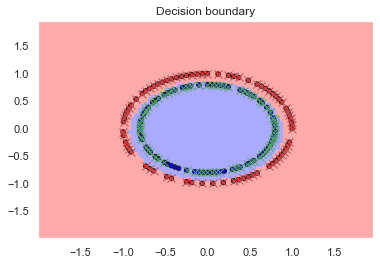

In [14]:
rbfsvc = svm.SVC(kernel='rbf', gamma=0.5)
rbfsvc.fit(X_train, y_train)

print("Accurary in the training set..%f" % metrics.accuracy_score(y_true=y_train, y_pred=rbfsvc.predict(X_train)))
print("Accurary in the test set......%f" % metrics.accuracy_score(y_true=y_test, y_pred=rbfsvc.predict(X_test)))
print(rbfsvc)
plotDB(rbfsvc, X_train, y_train)
DisplaySupportVectors(X_train, y_train, rbfsvc)

Read more from [Understanding SVM](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

## Summary
 - SVM is good for high dimensional cases
 - LinearSVC can include a regularization term L2, or L1
 - KernelSVM can form non-linear decision boundaries
 
Cons
  - SVM does not work so well for really big data sizes
  - It has also problems if there is plenty of noise in the data, so that classes are overlapping
  - 